In [1]:
import pandas as pd
import gc
import warnings
warnings.filterwarnings('ignore')

# ENDPOINT NRO 1 

def PlayTimeGenre( genero: str ) :<br> Debe devolver año con más horas jugadas para dicho género. <br>
Ejemplo de retorno: {"Año de lanzamiento con más horas jugadas para Género X" : 2013}

*- Creamos una lista de campos para solo cargar del archivo csv los campos que nos hacen falta*

In [2]:
ep3_items_columns = ['user_id', 'item_id', 'playtime_forever']

*- Cargamos el dataframe con los campos seleccionados del archivo australian_users_items.csv*

In [3]:
df_users_items = pd.read_csv('CSV//australian_users_items.csv',usecols=ep3_items_columns, sep=',', encoding='UTF-8')
df_users_items.head(2)

,user_id,playtime_forever,item_id
0,76561197970982479,6,10
1,js41637,0,10


*- Cargamos el dataframe con el archivo output_steaam_games.csv completo y visualizamos*

In [4]:
df_steam_games = pd.read_csv('CSV\output_steaam_games.csv', sep=",", encoding="UTF-8")
df_steam_games.head(2)

,title,release_date,price,item_id,developer,genres_Action,genres_Adventure,genres_Animation and Modeling,genres_Audio Production,genres_Casual,...,genres_Photo Editing,genres_RPG,genres_Racing,genres_Simulation,genres_Software Training,genres_Sports,genres_Strategy,genres_Utilities,genres_Video Production,genres_Web Publishing
0,Lost Summoner Kitty,2018.0,4.99,761140,Kotoshiro,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Lost Summoner Kitty,2018.0,4.99,761140,Kotoshiro,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


*- Hacemos un merge con los dos dataframe y visualizamos*

In [5]:
df_merge = df_users_items.merge(df_steam_games, on='item_id')
df_merge.sample(3)

,user_id,playtime_forever,item_id,title,release_date,price,developer,genres_Action,genres_Adventure,genres_Animation and Modeling,...,genres_Photo Editing,genres_RPG,genres_Racing,genres_Simulation,genres_Software Training,genres_Sports,genres_Strategy,genres_Utilities,genres_Video Production,genres_Web Publishing
7683,mwlucky,807,240,Counter-Strike: Source,2004.0,19.99,Valve,1,0,0,...,0,0,0,0,0,0,0,0,0,0
42622,76561198084584807,6104,4000,Garry's Mod,2006.0,9.99,Facepunch Studios,0,0,0,...,0,0,0,0,0,0,0,0,0,0
43992,TorTlew,7584,4000,Garry's Mod,2006.0,9.99,Facepunch Studios,0,0,0,...,0,0,0,0,0,0,0,0,0,0


*- Cambiamos el tipo de dato a release_date a int y reindexamos el dataframe y visualizamos los cambios*

In [6]:
df_merge['release_date'] = df_merge['release_date'].map(int)
df_merge.reset_index(drop=True, inplace=True)
df_merge.head(1)


,user_id,playtime_forever,item_id,title,release_date,price,developer,genres_Action,genres_Adventure,genres_Animation and Modeling,...,genres_Photo Editing,genres_RPG,genres_Racing,genres_Simulation,genres_Software Training,genres_Sports,genres_Strategy,genres_Utilities,genres_Video Production,genres_Web Publishing
0,76561197970982479,6,10,Counter-Strike,2000,9.99,Valve,1,0,0,...,0,0,0,0,0,0,0,0,0,0


*- Observamos la info del dataframe*

In [7]:
df_merge.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95785 entries, 0 to 95784
Data columns (total 28 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   user_id                         95785 non-null  object 
 1   playtime_forever                95785 non-null  int64  
 2   item_id                         95785 non-null  int64  
 3   title                           95785 non-null  object 
 4   release_date                    95785 non-null  int64  
 5   price                           95785 non-null  float64
 6   developer                       95785 non-null  object 
 7   genres_Action                   95785 non-null  int64  
 8   genres_Adventure                95785 non-null  int64  
 9   genres_Animation and Modeling   95785 non-null  int64  
 10  genres_Audio Production         95785 non-null  int64  
 11  genres_Casual                   95785 non-null  int64  
 12  genres_Design and Illustration  

*- Cargamos del dataframe al archivo consulta1.csv para los endpoints 1 y 2*

In [8]:
df_merge.to_csv('CSV\consulta1.csv', index=False)

*- Comenzamos a producir la consulta del endpoints nro 1*

*- Leemos el arhivo generado y lo cargamos en un dataframe*

In [9]:
df = pd.read_csv('CSV//consulta1.csv', sep=',', encoding='UTF-8')

*- Filtramos el dataframe por el genero de juego. En este caso utilizamos una variable con un valor para realizar la consulta*

In [10]:
df_filtrado = df[df['genres_Action'] == 1]

*- Agrupamos por release_date y sumamos el tiempo jugado para cada año*

In [11]:
 # Agrupa por año y suma las horas de juego
resumen = df_filtrado.groupby('release_date')['playtime_forever'].sum()

*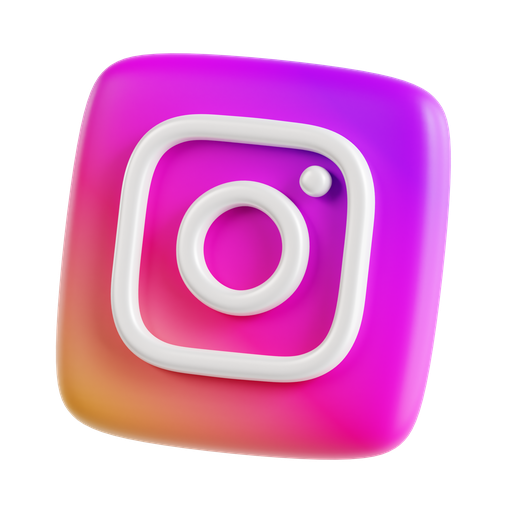 style="width:50px; height:50px;- Establecemos el año con mas horas jugadas, y la cantidad maxima de horas*

In [12]:
anio_mas_horas = resumen.idxmax()
max_horas_jugadas = resumen.max()

In [13]:
df1 = df_filtrado[df_filtrado['release_date'] == anio_mas_horas]

In [14]:
# Agrupa por año, y suma las horas de juego
resumen = df1.groupby(['release_date'])['playtime_forever'].sum().reset_index()

In [15]:

# Convierte el resultado en una lista de horas acumuladas por año
horas_acumuladas_por_año = []
for _, row in resumen.iterrows():
    horas_acumuladas_por_año.append({"Año": row["release_date"], "Horas": row["playtime_forever"]})

In [16]:
horas_acumuladas_por_año

[{'Año': 2004, 'Horas': 52713328}]

In [17]:
def query_data1(genero):
    try:
        df = pd.read_csv('CSV//consulta1.csv', sep=',', encoding='UTF-8')  
        df_filtrado = df[df[genero] == 1]
         # Agrupa por año y suma las horas de juego
        resumen = df_filtrado.groupby('release_date')['playtime_forever'].sum()
        anio_mas_horas = resumen.idxmax()
       
        return {
            "Año con más horas jugadas para Género " + genero: anio_mas_horas,
          
        }
    except Exception as e:
        return {"error": str(e)}

In [18]:
genero = 'genres_Adventure'
query_data1(genero)

{'Año con más horas jugadas para Género genres_Adventure': 2011}

In [19]:
genero = 'genres_Casual'
query_data1(genero)

{'Año con más horas jugadas para Género genres_Casual': 2017}

# ENDPOINT NRO 2 

def UserForGenre( genero: str ) :<br> Debe devolver el usuario que acumula más horas jugadas para el género dado y una lista de la acumulación de horas jugadas por año.<br>
Ejemplo de retorno: {"Usuario con más horas jugadas para Género X" : us213ndjss09sdf, "Horas jugadas":[{Año: 2013, Horas: 203}, {Año: 2012, Horas: 100}, {Año: 2011, Horas : 23}]}

In [20]:
df = pd.read_csv('CSV//consulta1.csv', sep=',', encoding='UTF-8')

In [21]:
df_filtrado = df[df['genres_Action'] == 1]

In [22]:
 # Agrupa por usuario y suma las horas de juego
resumen = df_filtrado.groupby('user_id')['playtime_forever'].sum()

In [23]:
usuario_mas_horas = resumen.idxmax()
max_horas_jugadas = resumen.max()

In [24]:
df1 = df_filtrado[df_filtrado['user_id'] == usuario_mas_horas]

In [25]:
# Agrupa por usuario y año, y suma las horas de juego
resumen = df1.groupby(['user_id', 'release_date'])['playtime_forever'].sum().reset_index()

In [26]:

# Convierte el resultado en una lista de horas acumuladas por año
horas_acumuladas_por_año = []
for _, row in resumen.iterrows():
    horas_acumuladas_por_año.append({"Año": row["release_date"], "Horas": row["playtime_forever"]})

In [27]:
horas_acumuladas_por_año

[{'Año': 2004, 'Horas': 388621}]

In [28]:
def query_data2(genero):
    try:
        df = pd.read_csv('CSV//consulta1.csv', sep=',', encoding='UTF-8')  

        df_filtrado = df[df[genero] == 1]

        # Agrupa por usuario y suma las horas de juego
        resumen = df_filtrado.groupby('user_id')['playtime_forever'].sum()

        usuario_mas_horas = resumen.idxmax()
        max_horas_jugadas = resumen.max()

        df1 = df_filtrado[df_filtrado['user_id'] == usuario_mas_horas]

        # Agrupa por usuario y año, y suma las horas de juego
        resumen = df1.groupby(['user_id', 'release_date'])['playtime_forever'].sum().reset_index()

        # Convierte el resultado en una lista de horas acumuladas por año
        horas_acumuladas_por_año = []
        for _, row in resumen.iterrows():
            horas_acumuladas_por_año.append({"Año": row["release_date"], "Horas": row["playtime_forever"]})

        return {
            "Usuario con más horas jugadas para Género " + genero: usuario_mas_horas,
            "Horas jugadas": horas_acumuladas_por_año
        }
    except Exception as e:
        return {"error": str(e)}

In [29]:
genero = 'genres_Adventure'
query_data2(genero)

{'Usuario con más horas jugadas para Género genres_Adventure': '76561198054840158',
 'Horas jugadas': [{'Año': 2014, 'Horas': 337453}]}

# ENDPOINT NRO 3 

def UsersRecommend( año: int ) : <br>Devuelve el top 3 de juegos MÁS recomendados por usuarios para el año dado. (reviews.recommend = True y comentarios positivos/neutrales)<br>
Ejemplo de retorno: [{"Puesto 1" : X}, {"Puesto 2" : Y},{"Puesto 3" : Z}]

In [30]:
df_users_reviews = pd.read_csv("CSV//australian_user_reviews.csv", sep=",", encoding='UTF-8')

In [31]:
df_users_reviews.head(3)

,user_id,item_id,recommend,review,posted year,sentiment_analysis
0,76561197970982479,1250.0,True,Simple yet with great replayability. In my opi...,2011.0,2
1,76561197970982479,22200.0,True,It's unique and worth a playthrough.,2011.0,2
2,76561197970982479,43110.0,True,Great atmosphere. The gunplay can be a bit chu...,2011.0,2


In [32]:
columnas = ['item_id', 'title']
df_output_steam_games = pd.read_csv('CSV\output_steaam_games.csv', usecols=columnas, sep=',', encoding='UTF-8')
df_output_steam_games.head(3)

,title,item_id
0,Lost Summoner Kitty,761140
1,Lost Summoner Kitty,761140
2,Lost Summoner Kitty,761140


In [33]:
df_output_steam_games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55612 entries, 0 to 55611
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    55612 non-null  object
 1   item_id  55612 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 869.1+ KB


Agregamos una columna concatenada para luego eliminar duplicados

In [34]:
df_output_steam_games['concatenada'] = df_output_steam_games['title'] + str(df_output_steam_games['item_id'])

In [35]:
# eliminamos duplicados
df_output_steam_games.drop_duplicates(inplace=True)

In [36]:
df_output_steam_games.head(1)

,title,item_id,concatenada
0,Lost Summoner Kitty,761140,Lost Summoner Kitty0 761140\n1 7...


In [37]:
# eliminamos la columna agregada
df_output_steam_games.drop('concatenada', axis=1, inplace=True)

Hacemos un merge de los dos dataframe

In [38]:
df_merge = df_users_reviews.merge(df_output_steam_games, on='item_id')

Filtramos solo los que tienen recomendacion True

In [39]:
df_merge = df_merge[df_merge['recommend']==True]

In [40]:
df_merge['posted year'].unique()

array([2011., 2015., 2013., 2014., 2010., 2012.,   nan])

In [41]:
df_merge.info()

<class 'pandas.core.frame.DataFrame'>
Index: 43262 entries, 0 to 48338
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   user_id             43262 non-null  object 
 1   item_id             43262 non-null  float64
 2   recommend           43262 non-null  object 
 3   review              43241 non-null  object 
 4   posted year         36324 non-null  float64
 5   sentiment_analysis  43262 non-null  int64  
 6   title               43262 non-null  object 
dtypes: float64(2), int64(1), object(4)
memory usage: 2.6+ MB


In [42]:
df_merge.dropna(inplace=True)

In [43]:
df_merge['posted year'] = df_merge['posted year'].astype(int)

In [44]:
df_merge.head(1)

,user_id,item_id,recommend,review,posted year,sentiment_analysis,title
0,76561197970982479,1250.0,True,Simple yet with great replayability. In my opi...,2011,2,Killing Floor


Pasamos el dataframe a csv para utilizar en la consulta

In [45]:
df_merge.to_csv('CSV\consulta3.csv', index=False)

In [46]:
df3 = pd.read_csv('CSV\consulta3.csv', sep=',', encoding='UTF-8')

In [47]:
año = 2011
df_filtrado = df3[df3['posted year'] == año] 

In [48]:
df_filtrado.info()

<class 'pandas.core.frame.DataFrame'>
Index: 436 entries, 0 to 36161
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   user_id             436 non-null    object 
 1   item_id             436 non-null    float64
 2   recommend           436 non-null    bool   
 3   review              436 non-null    object 
 4   posted year         436 non-null    int64  
 5   sentiment_analysis  436 non-null    int64  
 6   title               436 non-null    object 
dtypes: bool(1), float64(1), int64(2), object(3)
memory usage: 24.3+ KB


In [49]:
df_filtrado.head(1)

,user_id,item_id,recommend,review,posted year,sentiment_analysis,title
0,76561197970982479,1250.0,True,Simple yet with great replayability. In my opi...,2011,2,Killing Floor


In [50]:
# Agrupar por 'item_id' y contar los valores 2 en la columna 'sentimiento'
conteo_sentimiento_2 = df_filtrado[df_filtrado['sentiment_analysis'] == 2].groupby('item_id').size()


In [51]:
# Ordenar en orden descendente según el conteo
conteo_sentimiento_2 = conteo_sentimiento_2.sort_values(ascending=False)
conteo_sentimiento_2


item_id
440.0       72
620.0       25
105600.0    21
4000.0      19
1250.0      14
            ..
15710.0      1
15700.0      1
15520.0      1
13600.0      1
24740.0      1
Length: 138, dtype: int64

In [52]:
top_3 = conteo_sentimiento_2.head(3)

In [53]:
# Obtener títulos de los ítems más recomendados
items_recomendados = top_3.index.tolist()
titulos_recomendados = df3[df3['item_id'].isin(items_recomendados)][['item_id', 'title']] \
                                .drop_duplicates().set_index('item_id').loc[items_recomendados]

In [54]:
titulos_recomendados = titulos_recomendados.reset_index(drop=True)
titulos_recomendados

,title
0,Team Fortress 2
1,Portal 2
2,Terraria


In [55]:
clave = ['Primero: ', 'Segundo: ', 'Tercero: ']
clave

['Primero: ', 'Segundo: ', 'Tercero: ']

In [56]:
valor = titulos_recomendados['title'].values
valor

array(['Team Fortress 2', 'Portal 2', 'Terraria'], dtype=object)

In [57]:
# Crear un diccionario a partir de los arrays usando zip()
diccionario = dict(zip(clave, valor))

In [58]:
diccionario

{'Primero: ': 'Team Fortress 2',
 'Segundo: ': 'Portal 2',
 'Tercero: ': 'Terraria'}

In [59]:
def UsersRecommend(año):
    
    df3 = pd.read_csv('CSV//consulta3.csv', sep=',', encoding='UTF-8')
    df_filtrado = df3[df3['posted year'] == año] 
    
    # Agrupar por 'item_id' y contar los valores 2 en la columna 'sentimiento'
    conteo_sentimiento_2 = df_filtrado[df_filtrado['sentiment_analysis'] == 2].groupby('item_id').size()
    
    # Ordenar en orden descendente según el conteo
    conteo_sentimiento_2 = conteo_sentimiento_2.sort_values(ascending=False)
    top_3 = conteo_sentimiento_2.head(3)

    # Obtener títulos de los ítems más recomendados
    items_recomendados = top_3.index.tolist()
    titulos_recomendados = df3[df3['item_id'].isin(items_recomendados)][['item_id', 'title']] \
                            .drop_duplicates().set_index('item_id').loc[items_recomendados]
    # Obtener los títulos como una lista para el diccionario
    valores = titulos_recomendados['title'].values.tolist()

    # Crear el diccionario con claves fijas para los primeros 3 títulos
    claves = ['Primero: ', 'Segundo: ', 'Tercero: ']
    diccionario = dict(zip(claves, valores))
    return diccionario


In [60]:
UsersRecommend(2014)

{'Primero: ': 'Team Fortress 2',
 'Segundo: ': 'Counter-Strike: Global Offensive',
 'Tercero: ': "Garry's Mod"}

# ENDPOINT NRO 4 

def UsersWorstDeveloper( año: int ) :<br>
Devuelve el top 3 de desarrolladores con juegos MENOS recomendados por usuarios para el año dado.<br> 
(reviews.recommend = False y comentarios negativos)

In [61]:
df_users_reviews = pd.read_csv("CSV//australian_user_reviews.csv", sep=",", encoding='UTF-8')

In [62]:
df_users_reviews.head(1)

,user_id,item_id,recommend,review,posted year,sentiment_analysis
0,76561197970982479,1250.0,True,Simple yet with great replayability. In my opi...,2011.0,2


In [63]:
columnas = ['item_id', 'developer']
df_output_steam_games = pd.read_csv('CSV\output_steaam_games.csv', usecols=columnas, sep=',', encoding='UTF-8')


In [64]:
df_output_steam_games.head(1)

,item_id,developer
0,761140,Kotoshiro


In [65]:
df_merge = df_users_reviews.merge(df_output_steam_games, on='item_id')

In [66]:
df_merge = df_merge[df_merge['recommend'] == False]

In [67]:
df = df_merge[['item_id', 'recommend', 'posted year', 'sentiment_analysis', 'developer']]

In [68]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 14031 entries, 29 to 120656
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   item_id             14031 non-null  float64
 1   recommend           14031 non-null  object 
 2   posted year         9993 non-null   float64
 3   sentiment_analysis  14031 non-null  int64  
 4   developer           14031 non-null  object 
dtypes: float64(2), int64(1), object(2)
memory usage: 657.7+ KB


In [69]:
df = df.dropna()

In [70]:
df['posted year'] = df['posted year'].astype(int)

In [71]:
df.to_csv('CSV\consulta4.csv', index=False)

In [72]:
df4 = pd.read_csv('CSV\consulta4.csv', sep=',', encoding='UTF-8')

In [73]:
año = 2012
df_filtrado = df4[df4['posted year'] == año] 

In [74]:
df_filtrado.head(10)

,item_id,recommend,posted year,sentiment_analysis,developer
470,440.0,False,2012,0,Valve
471,440.0,False,2012,0,Valve
3964,209870.0,False,2012,2,Hardsuit Labs
3965,209870.0,False,2012,2,Hardsuit Labs
5452,24240.0,False,2012,2,OVERKILL Software
5883,209100.0,False,2012,0,Slant Six Games
6314,202970.0,False,2012,0,Treyarch
6424,10680.0,False,2012,2,Rebellion
8030,57740.0,False,2012,2,"Coreplay GmbH,Bigmoon Studios"
8031,57740.0,False,2012,2,"Coreplay GmbH,Bigmoon Studios"


In [75]:
# Agrupar por 'item_id' y contar los valores 2 en la columna 'sentimiento'
conteo_sentimiento_0 = df_filtrado[df_filtrado['sentiment_analysis'] == 0].groupby('item_id').size()

In [76]:
# Ordenar en orden descendente según el conteo
conteo_sentimiento_0 = conteo_sentimiento_0.sort_values(ascending=False)
conteo_sentimiento_0

item_id
440.0       2
42920.0     1
55110.0     1
202970.0    1
209100.0    1
dtype: int64

In [77]:
top_3 = conteo_sentimiento_0.head(3)

In [78]:
# Obtener títulos de los ítems más recomendados
items_menos_recomendados = top_3.index.tolist()

In [79]:
items_menos_recomendados

[440.0, 42920.0, 55110.0]

In [80]:

developer_menos_recomendados = df4[df4['item_id'].isin(items_menos_recomendados)][['item_id', 'developer']] \
                                .drop_duplicates().set_index('item_id').loc[items_menos_recomendados]

In [81]:
developer_menos_recomendados = developer_menos_recomendados.reset_index(drop=True)
developer_menos_recomendados

,developer
0,Valve
1,NeoCoreGames
2,Volition


In [82]:
clave = ['Puesto 1: ', 'Puesto 2: ', 'Puesto 3: ']
clave

['Puesto 1: ', 'Puesto 2: ', 'Puesto 3: ']

In [83]:
valor = developer_menos_recomendados['developer'].values
valor

array(['Valve', 'NeoCoreGames', 'Volition'], dtype=object)

In [84]:
# Crear un diccionario a partir de los arrays usando zip()
diccionario = dict(zip(clave, valor))

In [85]:
diccionario

{'Puesto 1: ': 'Valve', 'Puesto 2: ': 'NeoCoreGames', 'Puesto 3: ': 'Volition'}

In [86]:
def UsersWorstDeveloper(año):
    df4 = pd.read_csv('CSV\consulta4.csv', sep=',', encoding='UTF-8')
    df_filtrado = df4[df4['posted year'] == año] 
    # Agrupar por 'item_id' y contar los valores 2 en la columna 'sentimiento'
    conteo_sentimiento_0 = df_filtrado[df_filtrado['sentiment_analysis'] == 0].groupby('item_id').size()
    # Ordenar en orden descendente según el conteo
    conteo_sentimiento_0 = conteo_sentimiento_0.sort_values(ascending=False)
    top_3 = conteo_sentimiento_0.head(3)
    # Obtener títulos de los ítems más recomendados
    items_menos_recomendados = top_3.index.tolist()
    developer_menos_recomendados = df4[df4['item_id'].isin(items_menos_recomendados)][['item_id', 'developer']] \
                                .drop_duplicates().set_index('item_id').loc[items_menos_recomendados]
    developer_menos_recomendados = developer_menos_recomendados.reset_index(drop=True)
    clave = ['Primero: ', 'Segundo: ', 'Tercero: ']
    valor = developer_menos_recomendados['developer'].values
    # Crear un diccionario a partir de los arrays usando zip()
    diccionario = dict(zip(clave, valor))

    return diccionario


In [87]:
UsersWorstDeveloper(2012)

{'Primero: ': 'Valve', 'Segundo: ': 'NeoCoreGames', 'Tercero: ': 'Volition'}

# ENDPOINT NRO 5 

def sentiment_analysis( empresa desarrolladora: str ) :<br> 
Según la empresa desarrolladora, se devuelve un diccionario con el nombre de la desarrolladora como llave y <br> 
una lista con la cantidad total de registros de reseñas de usuarios que se encuentran categorizados con un análisis de sentimiento como valor.

In [88]:
# Seleccionamos las columnas que vamos a usar y cargamos el dataframe a partir del archivo csv
columnas = ['user_id','item_id', 'sentiment_analysis']
df_users_reviews = pd.read_csv("CSV//australian_user_reviews.csv",usecols= columnas ,sep=",", encoding='UTF-8')

In [89]:
# eliminamos los valores NaN
df_users_reviews.dropna(inplace=True)

In [90]:
# Convertimos a int los valores de la columna item:id
df_users_reviews['item_id'] = df_users_reviews['item_id'].astype(int)

In [91]:
# Seleccionamos las columnas que vamos a usar y cargamos el dataframe a partir del archivo csv
columnas = ['item_id', 'developer']
df_output_steam_games = pd.read_csv('CSV\output_steaam_games.csv', usecols=columnas, sep=',', encoding='UTF-8')

In [92]:
df_output_steam_games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55612 entries, 0 to 55611
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   item_id    55612 non-null  int64 
 1   developer  55612 non-null  object
dtypes: int64(1), object(1)
memory usage: 869.1+ KB


In [93]:
# Unimos los dos dataframe
df_merge = df_users_reviews.merge(df_output_steam_games, on='item_id')

In [94]:
df_merge

,user_id,item_id,sentiment_analysis,developer
0,76561197970982479,1250,2,Tripwire Interactive
1,death-hunter,1250,2,Tripwire Interactive
2,DJKamBer,1250,0,Tripwire Interactive
3,diego9031,1250,2,Tripwire Interactive
4,76561198081962345,1250,2,Tripwire Interactive
...,...,...,...,...
120668,MeloncraftLP,262850,2,SkyGoblin
120669,vinquility,431510,2,Aeon Dream Studios
120670,vinquility,431510,2,Aeon Dream Studios
120671,vinquility,431510,2,Aeon Dream Studios


In [95]:
df_merge.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120673 entries, 0 to 120672
Data columns (total 4 columns):
 #   Column              Non-Null Count   Dtype 
---  ------              --------------   ----- 
 0   user_id             120673 non-null  object
 1   item_id             120673 non-null  int32 
 2   sentiment_analysis  120673 non-null  int64 
 3   developer           120673 non-null  object
dtypes: int32(1), int64(1), object(2)
memory usage: 3.2+ MB


In [96]:
# Filtramos por developer
df_filtrado = df_merge[df_merge['developer'] == 'Coreplay GmbH,Bigmoon Studios']

In [97]:
df_filtrado

,user_id,item_id,sentiment_analysis,developer
104755,companothemuslim,57740,0,"Coreplay GmbH,Bigmoon Studios"
104756,companothemuslim,57740,0,"Coreplay GmbH,Bigmoon Studios"
104757,companothemuslim,57740,0,"Coreplay GmbH,Bigmoon Studios"
104758,heyitissantooo,57740,2,"Coreplay GmbH,Bigmoon Studios"
104759,heyitissantooo,57740,2,"Coreplay GmbH,Bigmoon Studios"
104760,heyitissantooo,57740,2,"Coreplay GmbH,Bigmoon Studios"


In [98]:
# Obtener el conteo de cada valor en la columna 'sentimiento'
conteo_sentimientos = df_filtrado['sentiment_analysis'].value_counts()

# Almacenar los recuentos de cada valor en variables separadas
valor_0 = conteo_sentimientos.get(0, 0)  # Si no hay valores 0, asigna 0
valor_1 = conteo_sentimientos.get(1, 0)  # Si no hay valores 1, asigna 0
valor_2 = conteo_sentimientos.get(2, 0)  # Si no hay valores 2, asigna 0


In [99]:
# Preparo los datos para obtener la salida reequerida
r0 = 'Negativo = '
r1 = 'Neutro = '
r2 = 'Positivo = '
# Cargo en una lista el valor concatenado de los resultados con su respectivo mensaje
lista = [f"{r0}{valor_0}",f"{r1}{valor_1}", f"{r2}{valor_2}"]

In [100]:
lista

['Negativo = 3', 'Neutro = 0', 'Positivo = 3']

In [101]:
def sentiment_analysis(empresa: str):
    
    # Seleccionamos las columnas que vamos a usar y cargamos el dataframe a partir del archivo csv
    columnas = ['user_id','item_id', 'sentiment_analysis']
    df_users_reviews = pd.read_csv("CSV//australian_user_reviews.csv",usecols= columnas ,sep=",", encoding='UTF-8')
    
    # eliminamos los valores NaN
    df_users_reviews.dropna(inplace=True)
    # Convertimos a int los valores de la columna item:id
    df_users_reviews['item_id'] = df_users_reviews['item_id'].astype(int)

    # Seleccionamos las columnas que vamos a usar y cargamos el dataframe a partir del archivo csv
    columnas = ['item_id', 'developer']
    df_output_steam_games = pd.read_csv('CSV\output_steaam_games.csv', usecols=columnas, sep=',', encoding='UTF-8')

    # Unimos los dos dataframe
    df_merge = df_users_reviews.merge(df_output_steam_games, on='item_id')

    # Filtramos por developer
    df_filtrado = df_merge[df_merge['developer'] == empresa]

    # Obtengo el conteo de cada valor en la columna 'sentiment_analysis'
    conteo_sentimientos = df_filtrado['sentiment_analysis'].value_counts()

    # Almaceno los recuentos de cada valor en variables separadas
    valor_0 = conteo_sentimientos.get(0, 0)  # Si no hay valores 0, asigna 0
    valor_1 = conteo_sentimientos.get(1, 0)  # Si no hay valores 1, asigna 0
    valor_2 = conteo_sentimientos.get(2, 0)  # Si no hay valores 2, asigna 0

    # Preparo los datos para obtener la salida reequerida
    r0 = 'Negativo = '
    r1 = 'Neutro = '
    r2 = 'Positivo = '
    # Cargo en una lista el valor concatenado de los resultados con su respectivo mensaje
    lista = [f"{r0}{valor_0}",f"{r1}{valor_1}", f"{r2}{valor_2}"]
    
    return {empresa: lista}
    
    
    
    

In [102]:
empresa = 'SkyGoblin'
sentiment_analysis(empresa)

{'SkyGoblin': ['Negativo = 0', 'Neutro = 0', 'Positivo = 4']}

# ENDPOINT NRO 6

-*el modelo deberá tener una relación ítem-ítem, esto es se toma un ítem, en base a que tan similar ese ítem al resto, se recomiendan similares. Aquí la entrada es un juego y la salida es una lista de juegos recomendados, para ello recomendamos aplicar la similitud del código*

In [103]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

In [104]:
col2 = ['item_id', 'title']
df_output_steam_games = pd.read_csv('CSV\\output_steaam_games.csv', usecols=col2, sep=',', encoding='UTF-8')

In [105]:
df_output_steam_games.shape

(55612, 2)

In [106]:
df_output_steam_games.head(2)

,title,item_id
0,Lost Summoner Kitty,761140
1,Lost Summoner Kitty,761140


In [107]:
df = df_output_steam_games.drop_duplicates()

In [108]:
df.shape

(22529, 2)

In [116]:
porcentaje = 0.4
subset = df.sample(frac=porcentaje, random_state=42)

In [117]:
subset.shape

(9012, 2)

In [118]:
subset.to_csv('CSV\consulta6.csv', index=False)

In [111]:
df = pd.read_csv('CSV\consulta6.csv',sep=',', encoding='UTF-8')

In [112]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22529 entries, 0 to 22528
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    22529 non-null  object
 1   item_id  22529 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 352.1+ KB


In [113]:
item = 761140

In [114]:
def obtener_title_por_id(item: int):
    
    titulo = df.loc[df['item_id'] == item, 'title'].values
    if len(titulo) > 0:
        titulo = titulo[0]
        #Crear un vectorizador TF-IDF
        
        top_5 = 5
        vectorizer = TfidfVectorizer()
        tfidf_matrix = vectorizer.fit_transform(df['title'])
        top_5 = 5
        idx = df[df['title'] == titulo].index[0]
        sim_scores = list(enumerate(cosine_similarity[idx]))
        sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse = True)
        top_5 = int(top_5)
        sim_scores = sim_scores[1:top_5+1]
        game_indices = [i[0] for i in sim_scores]
        resultado = {"Juegos recomendados por Item-ltem ":titulo}
        diccionario = df['title'].iloc[game_indices].tolist()
      
        return resultado,diccionario

      
    else:
        return None 

In [115]:
obtener_title_por_id(item)

TypeError: 'function' object is not subscriptable

In [ ]:

def recomendacion_juego(item: int):
    df = pd.read_csv('CSV//consulta6.csv', sep=',', encoding='UTF-8')
    
    # Verifica si el item_id existe en el DataFrame
    if item in df['item_id'].values:
        # Obtén el título del juego para el item_id dado
        titulo = df.loc[df['item_id'] == item, 'title'].values[0]
        
        # Calcula la matriz TF-IDF
        vectorizer = TfidfVectorizer()
        tfidf_matrix = vectorizer.fit_transform(df['title'])
        
        # Calcula la similitud de coseno entre todos los títulos
        sim_scores = cosine_similarity(tfidf_matrix, tfidf_matrix)
        
        # Encuentra los índices de los juegos más similares (excluyendo el propio juego)
        idx = df[df['title'] == titulo].index[0]
        game_indices = sim_scores[idx].argsort()[-6:-1][::-1]
        
        # Obtiene los títulos de los juegos recomendados
        juegos_recomendados = df.iloc[game_indices]['title'].tolist()
        
        return {
            "Juego consultado": titulo,
            "Juegos recomendados": juegos_recomendados
        }
    else:
        return {"error": "El item_id no existe en el DataFrame."}



In [ ]:
recomendacion_juego(282010)

{'Juego consultado': 'Carmageddon Max Pack',
 'Juegos recomendados': ['Carmageddon: Max Damage',
  'Carmageddon TDR 2000',
  'Carmageddon 2: Carpocalypse Now',
  'Mad Max',
  "Max, an Autistic Journey - Max's Birthday DLC"]}